In [1]:
import os 

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm 
import matplotlib.patches as patches
import json 
import tifffile

import gc 
import random

ModuleNotFoundError: No module named 'PIL'

In [2]:
# Path to the slices 
data_dir = 'D:\sagar\Data'

In [3]:
# function to save slices of a volume into a defined folder 

def saveSlices(volume, folderName):
    depth = volume.shape[0]
    for aSlice in range(depth):
        img = volume[aSlice, :, :]
        if not os.path.exists(folderName):
            os.makedirs(folderName)
        fName = os.path.join(folderName, f'slice_{aSlice}.tif') 
        tifffile.imsave(fName, img)

In [4]:
# Get the directories with roi and tiles.json from D
scans = []
for p in os.listdir(data_dir):
    tile_path = os.path.join(data_dir, p, 'tiles.json')
    if os.path.exists(tile_path):
        scans.append(os.path.join(data_dir, p))
                

In [7]:
completed = ['D:\\sagar\\Data\\MD_1264_A10_Z6.6mm',
             'D:\\sagar\\Data\\MD_1264_A11_Z3.3mm_corr_phrt ', 
             'D:\\sagar\\Data\\MD_1264_A12_Z3.3mm_corr_phrt', 
             'D:\\sagar\\Data\\MD_1264_A13_1_Z3.3mm_corr_phrt',
             'D:\\sagar\\Data\\MD_1264_A16_Z3.3mm_corr_phrt',
             'D:\\sagar\\Data\\MD_1264_A18',
             'D:\\sagar\\Data\\MD_1264_A2_1_Z3.3mm',
             'D:\\sagar\\Data\\MD_1264_A11_Z3.3mm_corr_phrt',
             'D:\\sagar\\Data\\MD_1264_A9_Z0.0mm_Z3.3mm',
             'D:\\sagar\\Data\\MD_1264_B5_1_Z3.3mm',
             'D:\\sagar\\Data\\MD_1264_B1_1_Z3.3mm_corr_phrt',
             
             ]

In [8]:
scans_now = list(set(scans) - set(completed))

In [10]:
# Loop through the directories by replacing path name to load the Slices from Drive Sagar
count = 1
for s in scans_now:
    print('procrssing ', count, '/', len(scans_now), ':  file', s, '\n')
    count += 1

    scan_dir = os.path.join('H:', s.split('Data')[1], 'slices')
    slices = os.listdir(scan_dir)
    
    #    first read one slice to get the shape 
    im = Image.open(os.path.join(scan_dir, slices[0]))
    im = np.array(im)
    
    
    #    initialize the volume and load the whole volume 
    vol = np.empty(shape=(1700, im.shape[0], im.shape[1]), dtype=np.float32)
    
    for i, fname in enumerate(tqdm(slices)):
        img = Image.open(os.path.join(scan_dir, fname))
        imgarray = np.array(img)
        vol[i, :, :] = imgarray
        
    #    seperate roi volume form tiles 
    tiles_path = os.path.join(s, 'tiles.json')
    f = open(tiles_path)
    data = json.load(f)
    all_tiles = data['roi']
    f.close()
    rois = os.listdir(os.path.join(s, 'roi'))
    tiles_wo_roi = list(set(all_tiles) - set(rois))
    
    #    Choose tiles randomly : Number of choosen tiles should be 1.3 times the roi number. (rounded int)
    selected_tiles = random.sample(tiles_wo_roi, round(len(rois)*1.3))
    
    #    Save the tiles to drive D in the same scan folder.
    for t in selected_tiles:
        cords = t.split('x')
        zcord, ycord, xcord = cords[0], cords[1], cords[2]
        tile_vol = vol[int(zcord.split('-')[0]):int(zcord.split('-')[1]), int(ycord.split('-')[0]):int(ycord.split('-')[1]), int(xcord.split('-')[0]):int(xcord.split('-')[1]),]
        tiles_dir = os.path.join(s, 'not_roi', t)
        saveSlices(tile_vol, tiles_dir)
    # Free up some memory
    del vol
    gc.collect()
        
        
    

procrssing  1 / 16 :  file D:\sagar\Data\MD_1264_A11_Z3.3mm_corr_phrt 



100%|██████████████████████████████████████████████████████████████████████████████| 1700/1700 [45:29<00:00,  1.61s/it]


procrssing  2 / 16 :  file D:\sagar\Data\MD_1264_A9_Z0.0mm_Z3.3mm 



100%|██████████████████████████████████████████████████████████████████████████████| 1700/1700 [46:53<00:00,  1.65s/it]


procrssing  3 / 16 :  file D:\sagar\Data\MD_1264_B5_1_Z3.3mm 



100%|██████████████████████████████████████████████████████████████████████████████| 1700/1700 [47:46<00:00,  1.69s/it]


procrssing  4 / 16 :  file D:\sagar\Data\MD_1264_B1_1_Z3.3mm_corr_phrt 



100%|████████████████████████████████████████████████████████████████████████████| 1700/1700 [4:41:04<00:00,  9.92s/it]


procrssing  5 / 16 :  file D:\sagar\Data\MD_1264_B2_1 



100%|██████████████████████████████████████████████████████████████████████████████| 1700/1700 [47:07<00:00,  1.66s/it]


procrssing  6 / 16 :  file D:\sagar\Data\MD_1264_A4_1_Z0.0mm_Z0.0mm_corr_phrt 



100%|██████████████████████████████████████████████████████████████████████████████| 1700/1700 [45:47<00:00,  1.62s/it]


procrssing  7 / 16 :  file D:\sagar\Data\MD_1264_B10_Z3.3mm 



100%|██████████████████████████████████████████████████████████████████████████████| 1700/1700 [46:32<00:00,  1.64s/it]


procrssing  8 / 16 :  file D:\sagar\Data\MD_1264_B4_1_Z3.3mm 



100%|██████████████████████████████████████████████████████████████████████████████| 1700/1700 [47:09<00:00,  1.66s/it]


procrssing  9 / 16 :  file D:\sagar\Data\MD_1264_A3_1_Z0.0mm 



100%|██████████████████████████████████████████████████████████████████████████████| 1700/1700 [45:52<00:00,  1.62s/it]


procrssing  10 / 16 :  file D:\sagar\Data\MD_1264_A6_1_Z3.3mm_corr_phrt 



100%|██████████████████████████████████████████████████████████████████████████████| 1700/1700 [46:46<00:00,  1.65s/it]


procrssing  11 / 16 :  file D:\sagar\Data\MD_1264_A4_1_Z0.0mm_Z3.3mm_corr_phrt 



100%|██████████████████████████████████████████████████████████████████████████████| 1700/1700 [47:32<00:00,  1.68s/it]


procrssing  12 / 16 :  file D:\sagar\Data\MD_1264_B9_Z3.3mm 



100%|██████████████████████████████████████████████████████████████████████████████| 1700/1700 [47:49<00:00,  1.69s/it]


procrssing  13 / 16 :  file D:\sagar\Data\MD_1264_B3_1_Z3.3mm 



100%|██████████████████████████████████████████████████████████████████████████████| 1700/1700 [47:56<00:00,  1.69s/it]


procrssing  14 / 16 :  file D:\sagar\Data\MD_1264_A3_1_Z3.3mm 



100%|██████████████████████████████████████████████████████████████████████████████| 1700/1700 [46:33<00:00,  1.64s/it]


procrssing  15 / 16 :  file D:\sagar\Data\MD_1264_A3_1_Z6.6mm 



100%|██████████████████████████████████████████████████████████████████████████████| 1700/1700 [47:15<00:00,  1.67s/it]


procrssing  16 / 16 :  file D:\sagar\Data\MD_1264_A8_1_Z3.3mm_corr_phrt 



100%|██████████████████████████████████████████████████████████████████████████████| 1700/1700 [46:34<00:00,  1.64s/it]


In [12]:
gc.collect()

0

In [30]:
rect = patches.Rectangle((600, 1050), 300, 300, linewidth=1, edgecolor='g', facecolor='none')
rect2 = patches.Rectangle((800, 1450), 300, 300, linewidth=1, edgecolor='g', facecolor='none')

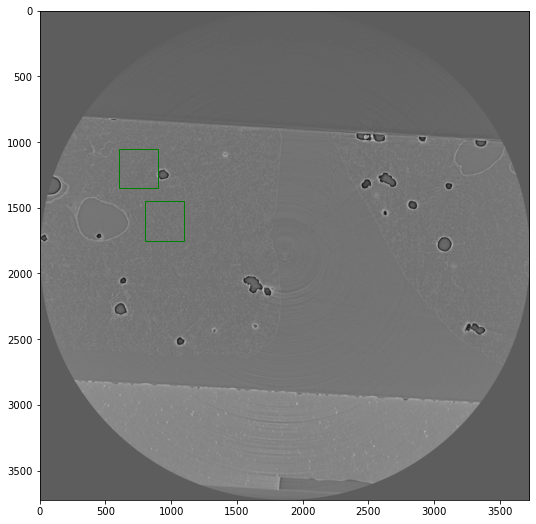

In [31]:
fig, ax = plt.subplots(figsize=(16,9))
ax.imshow(vol[250, :, :], cmap='gray')
ax.add_patch(rect)
ax.add_patch(rect2)
plt.show()

In [83]:
del vol